# 선 그래프 (Line plot) 그리기
## 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.
- 선 스타일
    - linestyle 속성에 설정
    - https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html    

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/서울시 연도별 황사 경보발령 현황.csv",index_col=0)
df.head(3)

,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
년도,,,,,,
2006,4,5,1,2,11,2941
2007,3,4,1,1,12,1355
2008,1,1,1,1,11,933


In [ ]:
df.rename(columns={df.columns[-1]:"최대농도"},inplace=True)

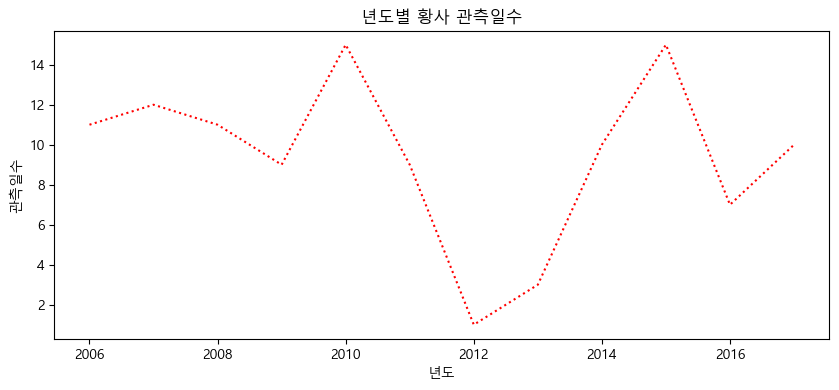

In [23]:
#년도별 관측일수 변화.
plt.figure(figsize=(10,4))
#line plot -> plot(x,y)
plt.plot(df.index
         ,df["관측일수"]
         ,color="red"
        ,linestyle=":")

plt.title("년도별 황사 관측일수")
plt.xlabel("년도")
plt.ylabel("관측일수")
plt.show()

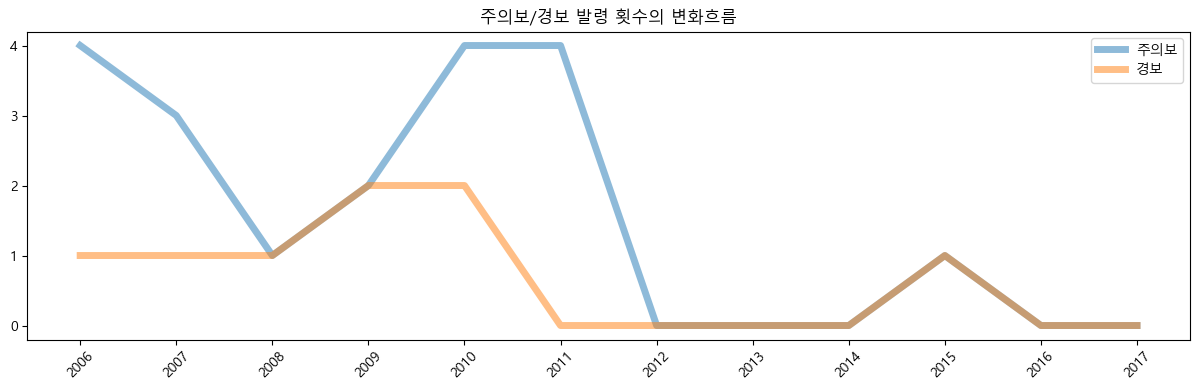

In [41]:
#주의보 발령횟수와 경보 발령횟수의 흐름을 비교
plt.figure(figsize=(15,4))
plt.plot(df.index,df["주의보 발령횟수"],linewidth=5,alpha=0.5,label="주의보") # alpha : (0~1)투명도 (겹친것을 보여주려고 설정했음)
plt.plot(df.index,df["경보 발령횟수"],linewidth=5,alpha=0.5,label="경보")

plt.title("주의보/경보 발령 횟수의 변화흐름")
plt.legend()

## 눈금(ticks)를 변경
plt.xticks(df.index,rotation=45) # x축 눈금을 변경. 눈금의 위치를 설정. label 설정.
plt.yticks(range(5))
plt.show()

두 데이터셋을 합쳐서 최소값, 최대값을 기준으로 축(y축)의 범위가 잡힌다.
- 두 데이터셋의 scale(값의 단위/범위)가 다른 경우, 표현이 잘 안되는 문제가 발생

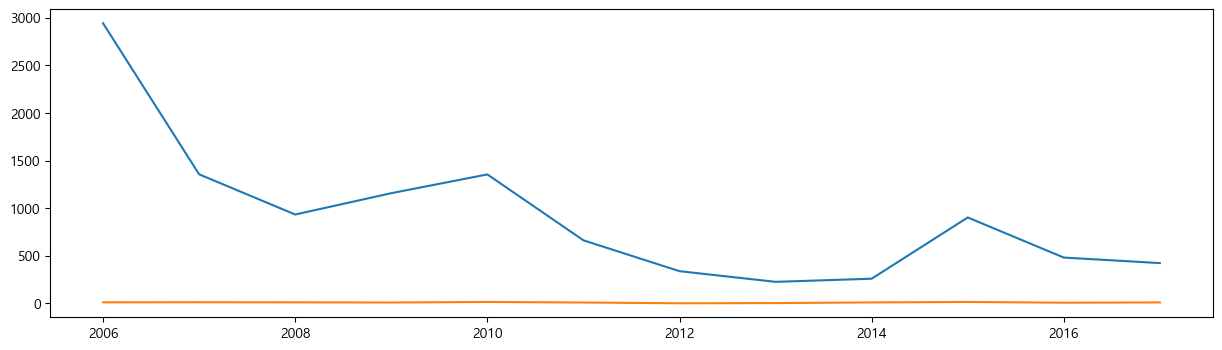

In [44]:
plt.figure(figsize=(15,4))
plt.plot(df.index,df["최대농도"],label="최대농도")
plt.plot(df.index,df["관측일수"],label="관측일수")
plt.show()

In [ ]:
# X축(년도)은 공유하고  y축을 나눠서 최대농도와 관착일수를 표현

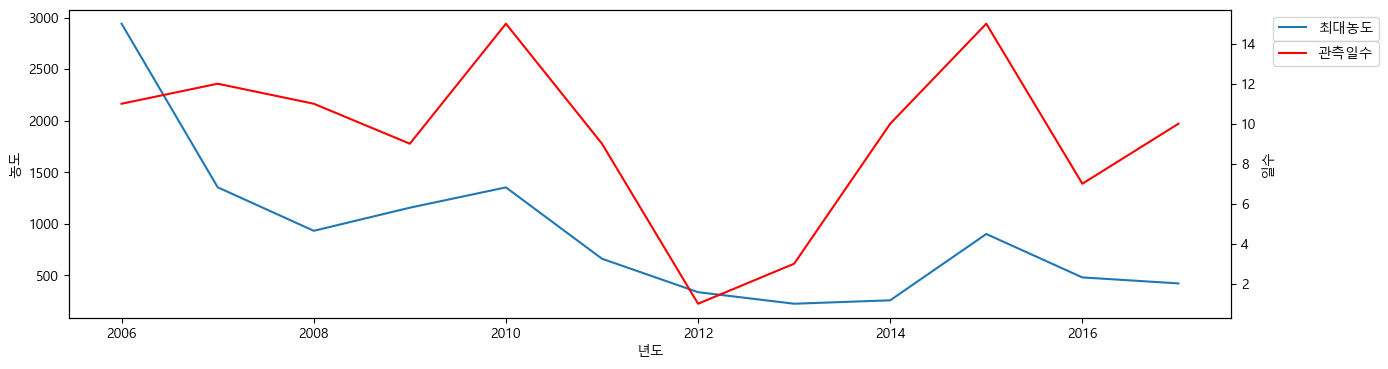

In [59]:
plt.figure(figsize=(15,4))

#axes(subplot)을 조회
ax1= plt.gca()
ax2 = ax1.twinx()

ax1.plot(df.index,df["최대농도"],label = "최대농도")
ax1.set_xlabel("년도")
ax1.set_ylabel("농도")
# ax1.legend(loc="upper center")
# 상하: upper,center,lower
# 좌우 : left,center,right

#bbox_to_anchor와 같이 loc를 같이 사용 => 원하는 위치에 지정
#bbox_to_anchor는 legend 박스를 그리기 시작할 점의 위치
#loc는 legend box의 어느 부분을 bbox_to_anchor에 위치할 것인지 지정.
ax1.legend(bbox_to_anchor=(1.03,1),loc="upper left")

ax2.plot(df.index,df["관측일수"],color="red",label="관측일수")
ax2.set_ylabel("일수")
ax2.legend(bbox_to_anchor=(1.03,0.92),loc="upper left")

plt.show()

In [63]:
import numpy as np
x=np.arange(1,4)
y= np.arange(10,31,10)

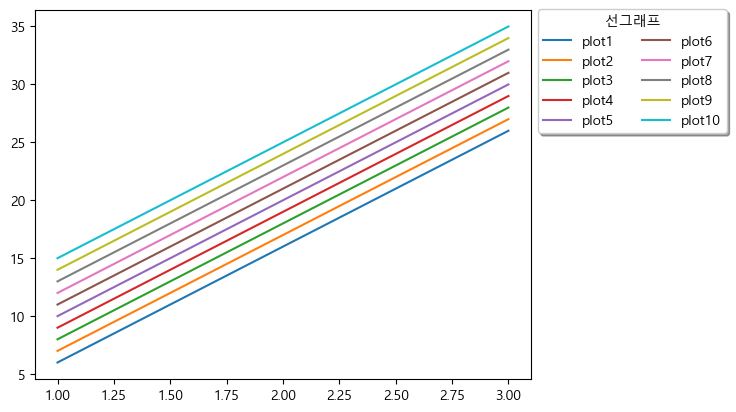

In [75]:
plt.plot(x,y-4,label="plot1")
plt.plot(x,y-3,label="plot2")
plt.plot(x,y-2,label="plot3")
plt.plot(x,y-1,label="plot4")
plt.plot(x,y,label="plot5")
plt.plot(x,y+1,label="plot6")
plt.plot(x,y+2,label="plot7")
plt.plot(x,y+3,label="plot8")
plt.plot(x,y+4,label="plot9")
plt.plot(x,y+5,label="plot10")
plt.legend(bbox_to_anchor=(1,1.02)
           ,loc = "upper left"
          ,title="선그래프"
          ,ncol=2 # n열로 표시
          ,shadow=True)

# 산점도 (Scatter Plot) 그리기
## 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 [상관관계나](#상관계수) 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
    - marker
        - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
        - https://matplotlib.org/stable/api/markers_api.html 

In [76]:
df = pd.read_csv("data/diamonds.csv")
df.shape

(53940, 10)

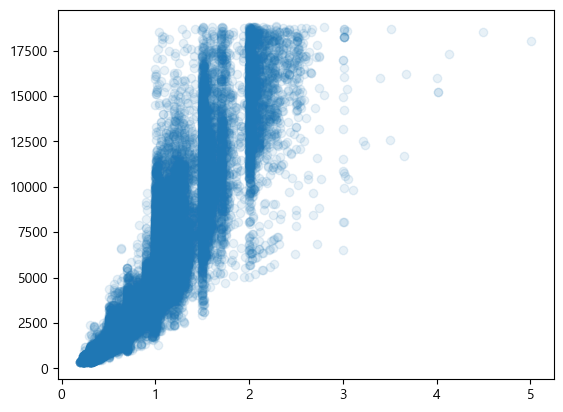

In [96]:
plt.scatter(df["carat"],df["price"]
           ,alpha=0.1)
plt.show()

> - ### 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - -1 ~ 1 사이의 값이 나온다. 
>         - 양의 상관관계: 0 ~ 1 (비례 관계) 
>         - 음의 상관관계: -1 ~ 0 (반비례 관계)
>         - 절대값 기준 1로 갈수록 두 변수의 상관관계가 강하고 0으로 갈수록 약하다.
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [ ]:
df.select_dtypes(exclude="object").corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


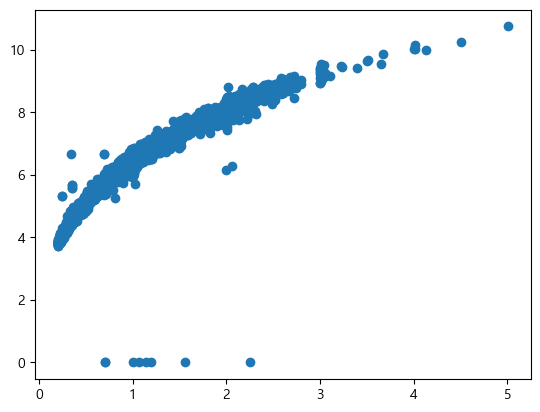

In [104]:
plt.scatter(df["carat"],df["x"])

# 막대그래프 (Bar plot) 그리기
## 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

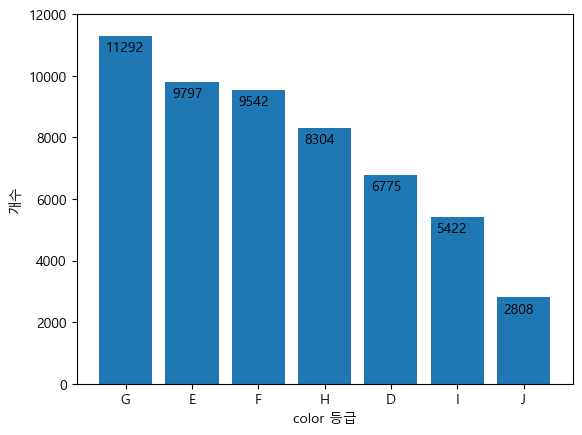

In [122]:
v = df["color"].value_counts()
plt.bar(v.index,v)

for x,y in enumerate(v):
    plt.text(x-0.3,y-500,str(y))

plt.ylim(0,12000)
plt.xlabel("color 등급")
plt.ylabel("개수")
plt.show()

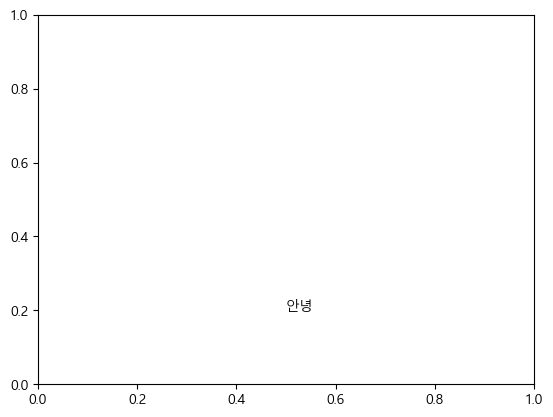

In [114]:
plt.text(0.5,0.2,"안녕") # (x위치,y위치)
plt.show()

In [125]:
df = pd.read_excel("data/강수량.xlsx",index_col = "계절")
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


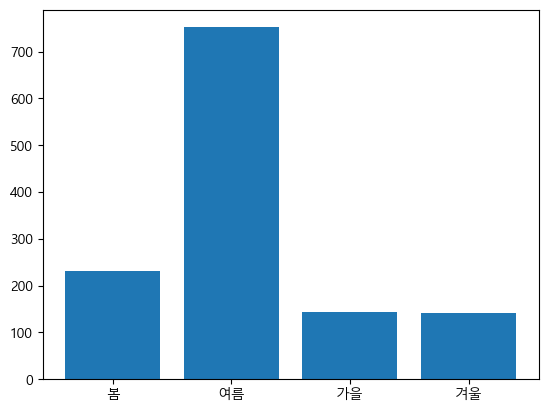

In [126]:
plt.bar(df.index,df[2009])
plt.show()

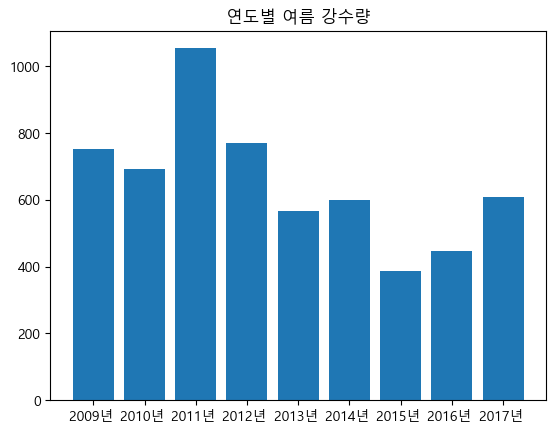

In [131]:
plt.bar(df.columns,df.loc["여름"])
plt.title("연도별 여름 강수량")
plt.xticks(range(2009,2018)
          ,labels=[f"{y}년 "for y in range(2009,2018)])
plt.show()

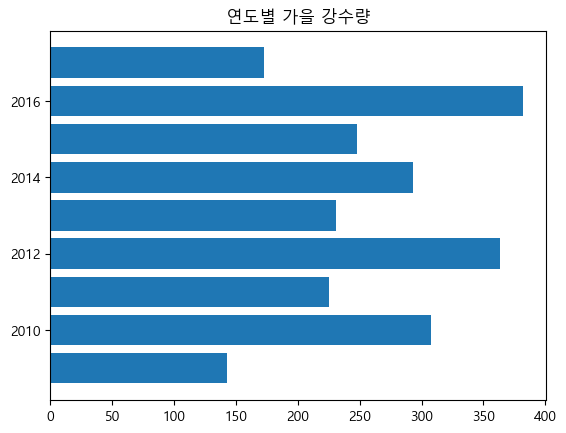

In [133]:
plt.barh(df.columns,df.loc["가을"])
plt.title("연도별 가을 강수량")
plt.show()

# 파이차트(Pie chart)
- 전체 데이터량에서 각 범주(Category)가 차지하는 비율을 나타내는데 사용
- `pie(x, labels)` 이용
    - x: 값 (값들을 100을 기준으로 비율을 계산해 크기 설정)
    - labels : 값들의 label
    - autopct: 조각내에 표시될 비율의 문자열 형식. '%fmt문자' 
        - fmt문자: f(실수), d(정수), %% (%)
- 한국 웹브라우저 점유율을 파이차트로 작성
    - https://www.koreanextweb.kr/front/stats/browser/browserUseStats.do

([<matplotlib.patches.Wedge at 0x1cb6f1f6f10>,
 [Text(1.0788638084435536, 0.2145993542177411, 'A'),
  Text(-0.7778174593052023, 0.7778174593052024, 'B'),
  Text(0.6111272563215621, -0.9146165735328001, 'C')])

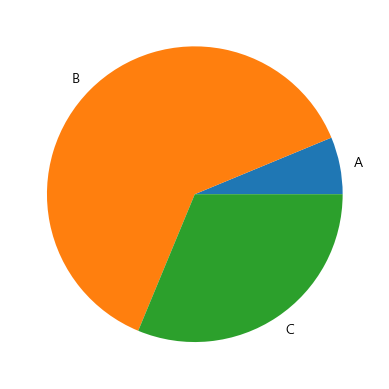

In [134]:
plt.pie([10,100,50],labels=["A","B","C"])

In [142]:
# converters{컬럼명 : 타입} => 컬럼을 지정한 타입으로 읽겠다는 의미 
web = pd.read_excel("data/webbrowser_share.xls"
                   ,converters={"date":str}
                   ,index_col = "date")

In [150]:
# chrome ~ Firefox 까지만 
web_df = web[web.columns[:5]].copy()
web_df.head()

,Chrome,Edge,Whale Browser,Safari,Firefox
date,,,,,
2023.01,71.04,16.89,5.86,2.95,1.51
2023.02,71.25,16.93,5.85,2.94,1.51
2023.03,71.95,16.57,5.79,3.00,1.30
2023.04,72.73,15.95,5.51,3.00,1.46
2023.05,72.44,16.14,5.79,3.25,1.24


In [151]:
## 나머지 조회 => 같은 행의 것들의 합계를 계산.
web_df["ETC"]= web[web.columns[5:]].sum(axis=1)
web_df

,Chrome,Edge,Whale Browser,Safari,Firefox,ETC
date,,,,,,
2023.01,71.04,16.89,5.86,2.95,1.51,1.71
2023.02,71.25,16.93,5.85,2.94,1.51,1.48
2023.03,71.95,16.57,5.79,3.00,1.30,1.34
2023.04,72.73,15.95,5.51,3.00,1.46,1.31
2023.05,72.44,16.14,5.79,3.25,1.24,1.12
2023.06,69.70,17.31,6.25,3.75,1.57,1.40
2023.07,70.21,17.63,5.86,3.23,1.67,1.38
2023.08,71.30,16.80,5.79,3.06,1.55,1.47
2023.09,74.07,14.98,5.76,2.58,1.49,1.12


In [154]:
web_df.columns

Index(['Chrome', 'Edge', 'Whale Browser', 'Safari', 'Firefox', 'ETC'], dtype='object')

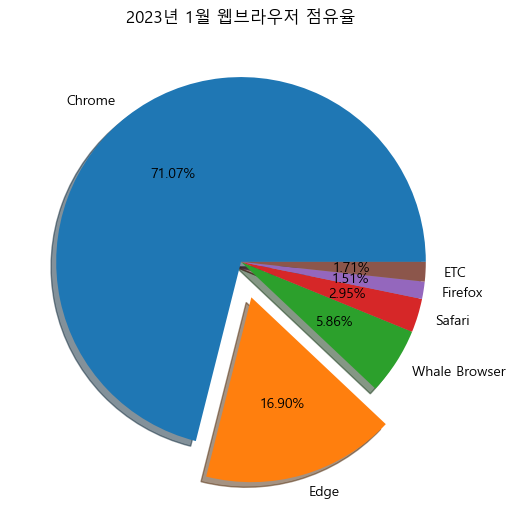

In [157]:
plt.figure(figsize=(6,6))
plt.pie(web_df.loc["2023.01"],
        labels=web_df.columns
        ,autopct="%.2f%%"
        ,explode=[0,0.2,0,0,0,0] # 컬럼 순
        ,shadow=True
       )
plt.title("2023년 1월 웹브라우저 점유율")
plt.show()

# 히스토그램(Histogram) 그리기
## 히스토그램

- 도수 분포표를 그래프로 나타낸 것.
    - 도수분포표: 연속형 자료를 특정 구간(bin)으로 나눠 그 빈도를 나타낸 표
        - 빈도 확인이나 **분포**를 볼때 사용한다.
    - X축: 계급(변수구간)의 대표값, Y축: 빈도수
- `hist(data [, bins=계급개수)` 메소드를 사용
    - data: 리스트형의 객체를 전달한다.

In [158]:
tips = pd.read_csv("data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [163]:
tips["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

(array([ 1.,  1.,  5.,  5., 20., 17., 24., 18., 26., 23., 15., 13., 11.,
        13.,  7.,  7.,  7.,  5.,  5.,  5.,  2.,  2.,  2.,  3.,  0.,  2.,
         1.,  0.,  3.,  1.]),
 array([ 3.07      ,  4.66133333,  6.25266667,  7.844     ,  9.43533333,
        11.02666667, 12.618     , 14.20933333, 15.80066667, 17.392     ,
        18.98333333, 20.57466667, 22.166     , 23.75733333, 25.34866667,
        26.94      , 28.53133333, 30.12266667, 31.714     , 33.30533333,
        34.89666667, 36.488     , 38.07933333, 39.67066667, 41.262     ,
        42.85333333, 44.44466667, 46.036     , 47.62733333, 49.21866667,
        50.81      ]),
 <BarContainer object of 30 artists>)

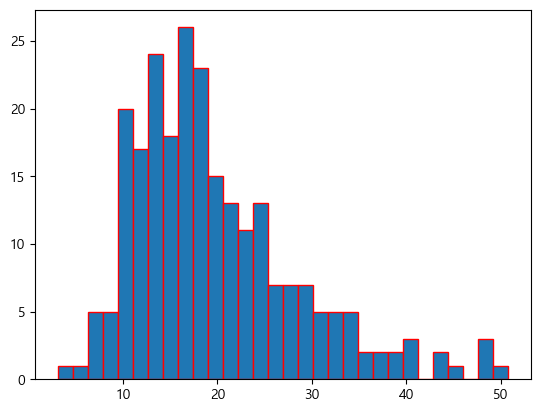

In [162]:
plt.hist(tips["total_bill"],bins=30,edgecolor="r")

# 상자그래프(Boxplot) 그리기
## 상자그래프란
- 연속형 값들의 사분위수, 극단값들을 이용해 값들의 분포를 시각화한다.
- boxplot(x, whis=1.5)
    - x: 데이터셋
    - whis: 극단치 계산시 사용할 값(기본 1.5)
        - IQR을 이용해 극단치 계산하기
            - IQR(Inter Quartile Range): $3분위수 - 1분위수$ 로 중간 50%값의 범위
            - 극단적으로 작은값: 1분위 - $IQR(3분위수-1분위수) * whis$   보다 작은 값들
            - 극단적으로 큰값: 3분위 + $IQR(3분위수-1분위수) * whis$  보다 큰 값들

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb6fd1e250>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb6fd1f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb6fd1d610>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb6fd29090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb6fc86410>],
 'means': []}

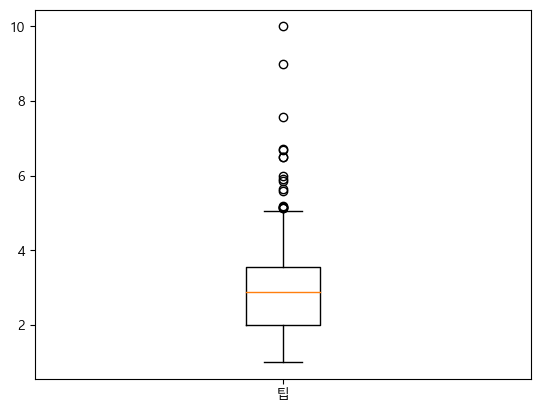

In [166]:
plt.boxplot(tips["tip"]
           ,labels="팁"
           ,whis=1)

In [172]:
m_tip = tips.loc[tips['sex']=="Male","tip"]
f_tip = tips.loc[tips['sex']=="Female","tip"]

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb6fddd1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb6fdde810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb6fddc810>,
 'medians': [<matplotlib.lines.Line2D at 0x1cb6fddfdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cb6fb90a90>,
 'means': []}

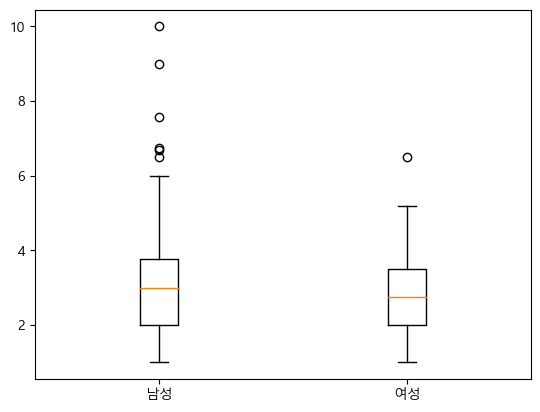

In [173]:
plt.boxplot([m_tip,f_tip],labels=["남성","여성"])